In [1]:
import json
import pandas as pd

In [19]:
# Step 1: Load JSON data from the file
with open('../../outputs/bohb_outputs/out2/configs.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    values = row_data[0] + list ( row_data[1].values() ) + list( row_data[2].values() )
    rows.append(values)

# # Step 3: Create a DataFrame
configs = pd.DataFrame(rows, columns=['i', 'j', 'k']+list ( row_data[1].keys() ) + list( row_data[2].keys() ))


In [20]:
configs.head()

,i,j,k,Conv__MaxPooling1D,Conv__NumberBlocks,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__dropout,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick
0,0,0,0,6,2,1,4,3,2,0.001567,...,32,64,8,128,2,0.007461,16,0.155113,0.000195,False
1,0,0,1,5,2,2,4,1,1,0.004217,...,128,8,32,8,1,0.024349,32,0.003902,0.000273,False
2,0,0,2,4,1,2,16,8,3,0.235325,...,8,64,64,32,4,0.003502,128,0.141180,0.000849,False
3,1,0,0,5,3,4,8,5,4,0.005355,...,64,128,32,64,2,0.022049,32,0.076569,0.001828,False
4,1,0,1,1,1,2,4,5,3,0.245313,...,8,256,8,128,1,0.025452,256,0.003764,0.000183,False


In [21]:
configs.shape

(168, 21)

---

In [22]:
import pandas as pd
import json

# Step 1: Load JSON data from the file
with open('../../outputs/bohb_outputs/out2/results.json', 'r') as file:
    loaded_data = file.readlines()

# Step 2: Extract values from each row
rows = []
for row in loaded_data:
    row_data = json.loads(row)
    
    if row_data[3] != None:
        values = row_data[0] + [round(row_data[1],2)] + \
                                list(row_data[2].values()) + \
                                 [row_data[3]['loss']] + \
                                row_data[3]['info']['test accuracy'] + \
                                row_data[3]['info']['validation accuracy'] +\
                                 row_data[3]['info']['train accuracy'] 
    # except TypeError or SyntaxError:
    #     pass
        rows.append(values)

# # Step 3: Create a DataFrame
# try:
loss_list = ['loss','gravity_loss', 'c_o_ratio_loss', 'metallicity_loss', 'temperature_loss', 'gravity_mae', 'c_o_ratio_mae', 'metallicity_mae', 'temperature_mae']


results = pd.DataFrame(rows, columns=['i', 'j', 'k', 'iteration']+
                                       list(row_data[2].keys())+['loss']+
                                       ['test_'+elem for elem in loss_list]+
                                       ['val_'+elem for elem in loss_list]+
                                       ['train_'+elem for elem in loss_list])

In [23]:
results.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,val_temperature_mae,train_loss,train_gravity_loss,train_c_o_ratio_loss,train_metallicity_loss,train_temperature_loss,train_gravity_mae,train_c_o_ratio_mae,train_metallicity_mae,train_temperature_mae
0,10,0,2,10.0,1.689444e+09,1.689444e+09,1.689480e+09,0.774481,0.781992,0.329255,...,0.143027,0.776700,0.322293,0.265152,0.169582,0.019673,0.688917,0.601616,0.475838,0.143033
1,0,0,0,10.0,1.689444e+09,1.689444e+09,1.689483e+09,0.264784,0.268992,0.106316,...,0.073621,0.263470,0.100271,0.053943,0.104349,0.004906,0.334836,0.246492,0.367766,0.070357
2,8,0,2,10.0,1.689444e+09,1.689444e+09,1.689492e+09,1.839236,1.859687,0.469297,...,0.832322,1.821479,0.462936,0.468548,0.456927,0.433067,0.863041,0.889008,0.850886,0.821347
3,8,0,1,10.0,1.689444e+09,1.689444e+09,1.689495e+09,1.313861,1.323371,0.465005,...,0.234024,1.310311,0.456048,0.377500,0.432360,0.044403,0.859178,0.766610,0.820658,0.236302
4,10,0,1,10.0,1.689444e+09,1.689444e+09,1.689496e+09,0.118278,0.122020,0.034619,...,0.104249,0.117500,0.031766,0.023114,0.053673,0.008948,0.197905,0.167203,0.262771,0.103964


In [24]:
results.shape

(120, 35)

In [25]:
# results.iloc[0]

In [26]:

# Concatenate DataFrames based on the first column (ID)
merged_df = pd.merge(results, configs, on=['i','j','k'])

# Print the concatenated DataFrame
merged_df.sort_values(by='loss', inplace=True)


In [27]:
merged_df.head()

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick
83,7,0,0,30.0,1.689444e+09,1.689444e+09,1.689858e+09,0.049740,0.049046,0.003907,...,64,16,256,8,4,0.098892,128,0.002186,0.000050,False
26,24,0,0,30.0,1.689573e+09,1.689573e+09,1.689760e+09,0.050968,0.050302,0.006188,...,16,16,8,128,2,0.006667,64,0.075569,0.001251,False
65,36,0,0,30.0,1.689830e+09,1.689830e+09,1.690086e+09,0.051296,0.050794,0.003901,...,64,256,8,64,2,0.025952,32,0.003120,0.000104,True
87,31,0,1,30.0,1.689593e+09,1.689593e+09,1.689871e+09,0.052894,0.052714,0.004894,...,32,256,128,128,2,0.026846,64,0.053397,0.000246,True
101,33,0,1,30.0,1.689660e+09,1.689660e+09,1.690007e+09,0.054298,0.053807,0.005624,...,64,32,128,16,1,0.286614,64,0.056017,0.000030,True


In [28]:
merged_df.sort_values(by='submitted').head(4)

,i,j,k,iteration,submitted,started,finished,loss,test_loss,test_gravity_loss,...,FC__units_c_o_ratio,FC__units_gravity,FC__units_metallicity,FC__units_temperature,FC_in_Conv__NumberLayers,FC_in_Conv__dropout,FC_in_Conv__units,FC_out_dropout,lr,model_based_pick
1,0,0,0,10.0,1.689444e+09,1.689444e+09,1.689483e+09,0.264784,0.268992,0.106316,...,32,64,8,128,2,0.007461,16,0.155113,0.000195,False
6,0,0,1,10.0,1.689444e+09,1.689444e+09,1.689498e+09,0.155014,0.157586,0.059480,...,128,8,32,8,1,0.024349,32,0.003902,0.000273,False
34,0,0,2,10.0,1.689444e+09,1.689444e+09,1.689600e+09,0.286202,0.283402,0.128489,...,8,64,64,32,4,0.003502,128,0.141180,0.000849,False
32,1,0,1,30.0,1.689444e+09,1.689444e+09,1.689585e+09,0.241843,0.250244,0.101575,...,8,256,8,128,1,0.025452,256,0.003764,0.000183,False


In [33]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import LogTicker, LogTickFormatter

def plot_CumulativeBudget_loss(loss_df_list, print_results=True, plot_results=True):
    output_notebook()

    p = figure(title='Cumulative Budget vs. Validation Huber Loss', 
               x_axis_label='Cumulative Budget',
               y_axis_label='Validation Huber Loss', 
               y_axis_type="log",
               width=800, height=400,
              x_range=(1,2001), y_range=(0.04, 1))

    for loss_df in loss_df_list:
        list_loss_smaller = []
        budget_list = []

        budget = merged_df.sort_values(by='submitted')['iteration']

        smallest_value = 1
        b = 0
        for i in range(len(loss_df)):
            b += int(budget[i])
            if val_loss[i] < smallest_value:
                smallest_value = loss_df[i]
                list_loss_smaller.append(smallest_value)
                budget_list.append(b)

        if print_results:
            print(budget_list, list_loss_smaller)

        if plot_results:
            p.scatter(budget_list, list_loss_smaller, marker='square', size=8, alpha=0.9, legend_label='Data Points')
            p.line(budget_list, list_loss_smaller, line_dash='dashed', line_alpha=0.5, legend_label='Interpolated Line')

    # p.x_range.start = 1
    # p.x_range.end = 301
    # p.y_range.start = 0.04
    # p.y_range.end = 1
    # # p.legend.title = 'Data Points and Interpolated Line'

    # Set logarithmic scale for both x and y axes
    # p.xaxis[0].ticker = LogTicker()
    # p.xaxis[0].formatter = LogTickFormatter()
    # p.yaxis[0].ticker = LogTicker()
    # p.yaxis[0].formatter = LogTickFormatter()

    # Set custom y-axis ticks
    yticks = [0.04, 0.05, 0.1, 0.5, 1.]
    p.yaxis.ticker = yticks
    p.yaxis.major_label_overrides = {tick: str(tick) for tick in yticks}

    show(p)


In [34]:
val_loss = merged_df.sort_values(by='submitted')['val_loss']
train_loss = merged_df.sort_values(by='submitted')['train_loss']
test_loss = merged_df.sort_values(by='submitted')['test_loss']

plot_CumulativeBudget_loss([val_loss],
                            print_results=False,)

Loading BokehJS ...

In [35]:
def plot_CumulativeBudget_loss(loss_df_list,
                              print_results = True,
                              plot_results = True,
                              ):
    for loss_df in loss_df_list:
        list_loss_smaller = []
        budget_list = []

        budget = merged_df.sort_values(by='submitted')['iteration']

        smallest_value = 1
        b = 0
        for i in range(len(loss_df)):
            b += int(budget[i])
            if val_loss[i] < smallest_value:
                smallest_value = loss_df[i]
                print(smallest_value)
                list_loss_smaller.append(smallest_value)
                budget_list.append(b)



        if print_results:
            print( budget_list, list_loss_smaller)



        if plot_results:
            import seaborn as sns
            import matplotlib.pyplot as plt

            sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": "-"})
            sns.scatterplot(x=budget_list, y=list_loss_smaller, marker='s', s=50, alpha=0.9)
            plt.plot(budget_list, list_loss_smaller, '--', alpha=0.5)
            plt.xlabel('Cumulative Budget', fontsize=12)
            plt.ylabel('Validation Huber Loss', fontsize=12)

            sns.set(style="ticks")
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim((1, 10000))
            plt.ylim((0.04, .6))
            plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='lightgray')
            plt.grid(True, which='major', axis='both', linestyle='-', linewidth=1, color='darkgrey')

            # Set custom y-axis ticks
            yticks = [0.04, 0.05, 0.1, 0.5, 1.]
            plt.yticks(yticks, [str(tick) for tick in yticks])
    plt.legend()

    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.7744809985160828
0.264783650636673
0.11827833950519562
0.11075330525636673
0.09743142873048782
0.06754410266876221
0.06498707085847855
0.050968050956726074
0.04973980039358139


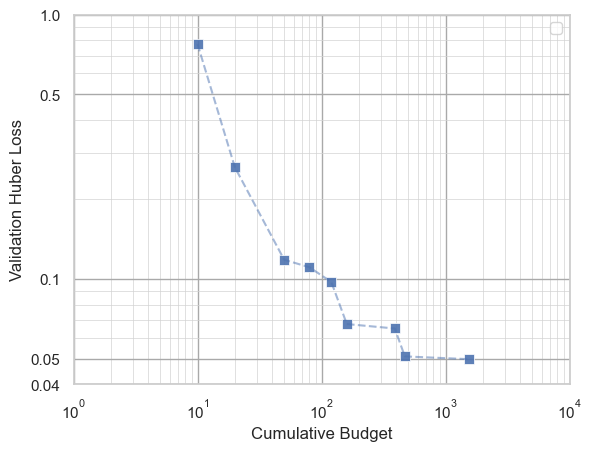

In [36]:
val_loss = merged_df.sort_values(by='submitted')['val_loss']
train_loss = merged_df.sort_values(by='submitted')['train_loss']
test_loss = merged_df.sort_values(by='submitted')['test_loss']

plot_CumulativeBudget_loss([val_loss],
                            print_results=False,)

In [37]:
merged_df.iloc[0]

i                                           7
j                                           0
k                                           0
iteration                                30.0
submitted                   1689443983.154186
started                     1689443983.154705
finished                    1689857588.292075
loss                                  0.04974
test_loss                            0.049046
test_gravity_loss                    0.003907
test_c_o_ratio_loss                   0.00721
test_metallicity_loss                0.036967
test_temperature_loss                0.000962
test_gravity_mae                     0.068561
test_c_o_ratio_mae                   0.093363
test_metallicity_mae                 0.202011
test_temperature_mae                 0.032354
val_loss                              0.04974
val_gravity_loss                     0.004015
val_c_o_ratio_loss                   0.007022
val_metallicity_loss                 0.037795
val_temperature_loss              

In [38]:
dict(merged_df.iloc[0, 35:-1])

{'Conv__MaxPooling1D': 2,
 'Conv__NumberBlocks': 1,
 'Conv__NumberLayers': 3,
 'Conv__filters': 4,
 'Conv__kernel_size': 6,
 'FC__NumberLayers': 4,
 'FC__dropout': 0.0024609140719442646,
 'FC__units': 64,
 'FC__units_c_o_ratio': 64,
 'FC__units_gravity': 16,
 'FC__units_metallicity': 256,
 'FC__units_temperature': 8,
 'FC_in_Conv__NumberLayers': 4,
 'FC_in_Conv__dropout': 0.09889223768186726,
 'FC_in_Conv__units': 128,
 'FC_out_dropout': 0.002185843015008406,
 'lr': 4.9946842008422193e-05}

In [21]:
merged_df.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberBlocks', 'Conv__NumberLayers',
       'Conv__filters', 'Conv__kernel_size', 'FC__NumberLayers', 'FC__units',
       'lr', 'model_based_pick'],
      dtype='object')

In [22]:
merged_df2 = merged_df [ merged_df['loss'] < 1 ]

In [23]:
merged_df2.shape

(13, 44)

In [24]:
merged_df2.columns

Index(['i', 'j', 'k', 'iteration', 'submitted', 'started', 'finished', 'loss',
       'test_loss', 'test_gravity_loss', 'test_c_o_ratio_loss',
       'test_metallicity_loss', 'test_temperature_loss', 'test_gravity_mae',
       'test_c_o_ratio_mae', 'test_metallicity_mae', 'test_temperature_mae',
       'val_loss', 'val_gravity_loss', 'val_c_o_ratio_loss',
       'val_metallicity_loss', 'val_temperature_loss', 'val_gravity_mae',
       'val_c_o_ratio_mae', 'val_metallicity_mae', 'val_temperature_mae',
       'train_loss', 'train_gravity_loss', 'train_c_o_ratio_loss',
       'train_metallicity_loss', 'train_temperature_loss', 'train_gravity_mae',
       'train_c_o_ratio_mae', 'train_metallicity_mae', 'train_temperature_mae',
       'Conv__MaxPooling1D', 'Conv__NumberBlocks', 'Conv__NumberLayers',
       'Conv__filters', 'Conv__kernel_size', 'FC__NumberLayers', 'FC__units',
       'lr', 'model_based_pick'],
      dtype='object')

In [26]:
data = merged_df[[
             'Conv__MaxPooling1D',
             # 'Conv__NumberBlocks',
             'Conv__NumberLayers',
             'Conv__filters',
             'Conv__kernel_size',
             'FC__NumberLayers',
             # 'FC__dropout',
             'FC__units',
             # 'FC__units_c_o_ratio',
             # 'FC__units_gravity',
             # 'FC__units_metallicity',
             # 'FC__units_temperature',
             # 'FC_in_Conv__dropout',
             # 'FC_in_Conv__units',
             # 'FC_out_dropout',
             'lr',
             'val_loss']
            ]

data.head()

,Conv__MaxPooling1D,Conv__NumberLayers,Conv__filters,Conv__kernel_size,FC__NumberLayers,FC__units,lr,val_loss
11,4,2,16,8,2,256,0.001158,0.059268
9,3,3,64,3,2,256,0.000154,0.060052
7,5,2,32,4,3,128,0.000011,0.072830
2,3,2,16,5,3,32,0.000256,0.077075
5,1,2,64,4,2,128,0.000038,0.079336


In [27]:
dict(merged_df2.sort_values('val_loss').iloc[0, 35:-1])

{'Conv__MaxPooling1D': 4,
 'Conv__NumberBlocks': 2,
 'Conv__NumberLayers': 2,
 'Conv__filters': 16,
 'Conv__kernel_size': 8,
 'FC__NumberLayers': 2,
 'FC__units': 256,
 'lr': 0.0011583726884897272}

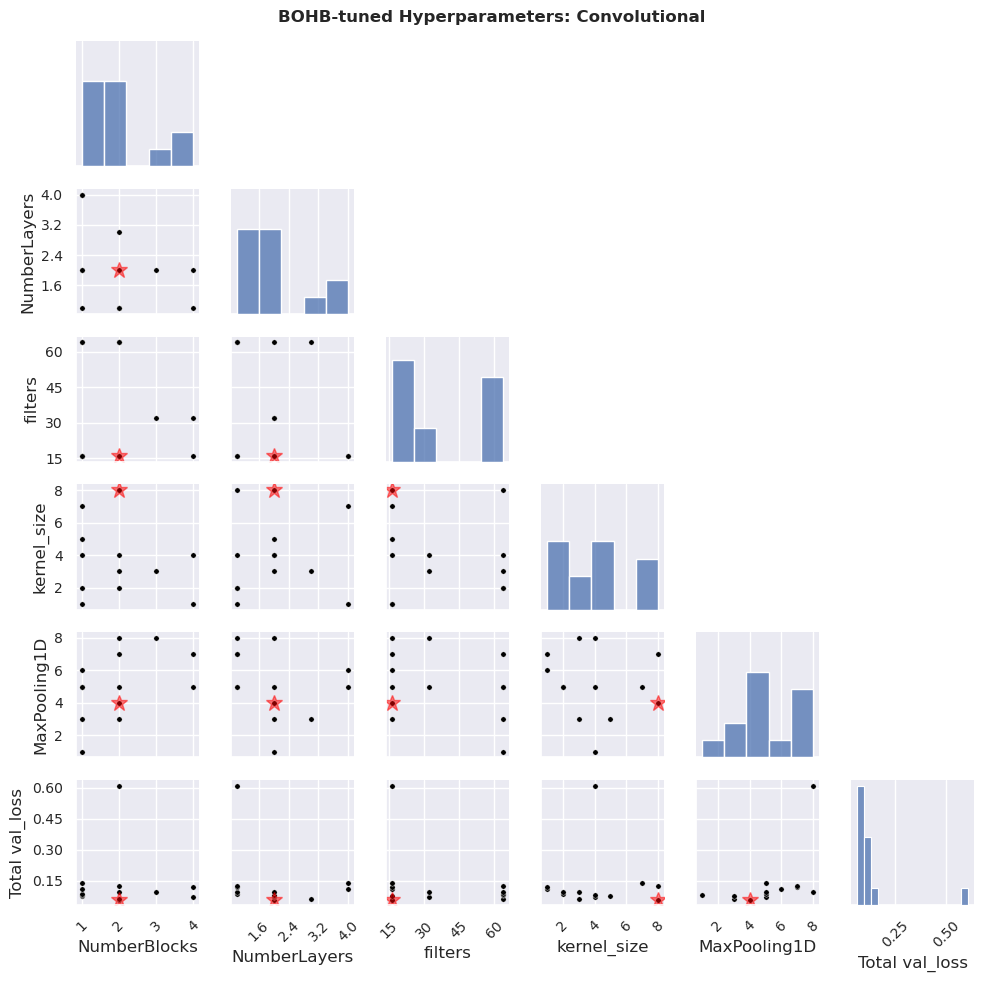

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator, LogLocator

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
    'Conv__NumberBlocks',
                  'Conv__NumberLayers',
                  'Conv__filters',
                  'Conv__kernel_size',
                  'Conv__MaxPooling1D',
                  'val_loss']]

# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
labels = [
          'NumberBlocks',
          'NumberLayers',
          'filters',
          'kernel_size',
          'MaxPooling1D',
          'Total val_loss']

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=12)
    g.axes[i, 0].set_ylabel(label, fontsize=12)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in [ 'NumberBlocks']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))
        # elif i == 0 and j==5:
        #     # Set logarithmic scale for the diagonal subplots
        #     g.axes[i, j].xaxis.set_major_locator(LogLocator(base=10))
        #     g.axes[i, j].xaxis.set_minor_locator(LogLocator(base=10, subs=[0.02,0.05,0.01, 0.5, 1.], numticks=10))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=12, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Convolutional", fontweight='bold', fontsize=12)

# Set the size of the figure to 10 inches by 10 inches
g.fig.set_size_inches(10, 10)

# plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FixedLocator
from matplotlib.patches import Rectangle

# Set the style
sns.set_style("darkgrid")

data = merged_df[[
                # 'FC_in_Conv__units',
                # 'FC_in_Conv__dropout',
                ###
                'FC__NumberLayers',
                'FC__units', 
                'FC__dropout', 
                ###
                'FC__units_c_o_ratio',
                'FC__units_gravity', 
                'FC__units_metallicity', 
                'FC__units_temperature',
                'FC_out_dropout',
                # # ###
                'lr',
                # ###
                'val_loss']]

# display(data)
# Find configurations with the lowest loss
min_loss = data['val_loss'].min()

# Define the pairplot
g = sns.PairGrid(data, corner=True, diag_sharey=True)

# Plot scatterplots on the lower triangle
g.map_lower(sns.scatterplot, color='black', s=15)

# Plot the distributions on the diagonal
g.map_diag(sns.histplot, kde=False)

# Customize the x-axis tick labels for each subplot
# Customize the x-axis tick labels for each subplot
labels = [
            # # ###
            # 'Units ($FC1$)',
            # 'Dropout ($FC1$)',
            ###
            'NumberLayers ($FC2$)',
            'Units ($FC2$)', 
            'Dropout ($FC2$)', 
            ###
            'Units_C/O ($FC3$)',
            'Units_$\log g$ ($FC3$)', 
            'Units_[M/H] ($FC3$)', 
            'Units_T$_{eff}$ ($FC3$)',
            'Dropout ($FC3$)',
            # # ###
            'lr',
            # ###
            'Total val_loss'
        ]

for i, label in enumerate(labels):
    g.axes[-1, i].set_xlabel(label, fontsize=16)
    g.axes[i, 0].set_ylabel(label, fontsize=16)

# Set the number of ticks on the x-axis for each subplot
num_ticks = 5
for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            if labels[j] in ['FC__units', 'FC__units_c_o_ratio']:
                # Set integer ticks for specific subplots
                g.axes[i, j].xaxis.set_major_locator(FixedLocator([4,8,16,32,64,128,256]))
                # g.axes[i, j].xaxis.set_major_locator(FixedLocator(np.arange(1, num_ticks + 1, dtype=int)))
            else:
                g.axes[i, j].xaxis.set_major_locator(MaxNLocator(num_ticks))
            g.axes[i, j].yaxis.set_major_locator(MaxNLocator(num_ticks))

# Mark the configurations with the lowest loss with a star inside the lower left half
lower_indices = np.tril_indices_from(g.axes, k=-1)
for i, j in zip(*lower_indices):
    x = data.iloc[:, j]
    y = data.iloc[:, i]
    mask = (data['val_loss'] == min_loss)
    
    if i >= j:
        g.axes[i, j].plot(x[mask], y[mask], marker='*', color='red', markersize=14, alpha=0.5)

# Customize the plot
g.fig.suptitle("BOHB-tuned Hyperparameters: Fully-Connected", fontweight='bold', fontsize=26)

# Set the size of the figure to 10 inches by 10 inches
# g.fig.set_size_inches(14, 14)
plt.tight_layout()

# Increase the size of xticks and yticks
for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)

for ax in g.axes[-1, :]:
    if ax is not None:
        plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


KeyError: "['FC__dropout', 'FC__units_c_o_ratio', 'FC__units_gravity', 'FC__units_metallicity', 'FC__units_temperature', 'FC_out_dropout'] not in index"